# Azure vs. AWS
[1. Auswahl geeigneter Testszenarien](#Testszenarien)\
[1.1 Testen der Spracherkennung](#Spracherkennung)\
[1.2 Testen der Bilderkennung](#Bilderkennung)\
[2. Textanalyse](#Textanalyse)\
[2.1 Language Detection](#LangDetectionAzure)\
[2.1.1 Language Detection - Azure](#LDAzure)\
[2.1.2 Language Detection - AWS](#LDAWS)\
[2.2 Entity Detection](#EntityDetection)\
[2.2.1 Entity Detection - Azure](#EDAzure)\
[2.2.2 Entity Detection - AWS](#EDAWS)\
[2.3 Schlüsselphrasen](#SPE)\
[2.3.1 Schlüsselphrasen - Azure](#SPEAzure)\
[2.3.2 Schlüsselphrasen - AWS](#SPEAWS)\
[2.4 Sentimentanalyse](#SA)\
[2.4.1 Sentimentanalyse - Azure](#SAAzure)\
[2.4.2 Sentimentanalyse - AWS](#SAAWS)\
[3. Bildanalyse](#Bildanalyse)\
[3.1 DetectFaces](#DetectFaces)\
[3.1.1 DetectFaces - Azure](#DFAzure)\
[3.1.2 DetectFaces - AWZ](#DFAWS)\
[3.2 DetectLabels](#DetectLabels)\
[3.2.1 DetectLabels - Azure](#DLAzure)\
[3.2.2 DetectLabels - AWZ](#DLAWS)\
[3.3 DetectText](#DetectText)\
[3.3.1 DetectText - Azure](#DTAzure)\
[3.3.2 DetectText - AWZ](#DTAWS)\
[3.4 RecognizeCelebrities](#RecognizeCelebrities)\
[3.4.1 RecognizeCelebrities - Azure](#RCAzure)\
[3.4.2 RecognizeCelebrities - AWZ](#RCAWS)\
[4. Zusammenfassung der Tests](#Zusammenfassung)\
[4.1 Gegenüberstellung Textanalysen](#GGText)\
[4.2 Gegenüberstellung Bildanalysen](#GGImage)

In [1]:
# Installationen falls notwendig
# !pip install boto3
# !pip install langcodes
# !pip install language_data
# !pip install azure-cognitiveservices-vision-face

In [2]:
from azure.core.credentials import AzureKeyCredential
from msrest.authentication import CognitiveServicesCredentials

# Allgemeine Konfiguration der Zugriffsschlüssel
azure_key = ""
azure_endpoint = ""
azure_credential = AzureKeyCredential(azure_key)
azure_cognitive_credentials = CognitiveServicesCredentials(azure_key)

AWS_ACCESS_KEY_ID = ""
AWS_SECRET_ACCESS_KEY = ""
AWS_REGION = ""

### 1. Auswahl geeigneter Testszenarien <a id='Testszenarien'></a>

#### Testen der Spracherkennung: <a id='Spracherkennung'></a>

**1. Test: Erkennen der Sprache aus einem Text**
- Verwendung des Datensets in Language Detection.csv: 200 Zufällige Einträge aus https://www.kaggle.com/datasets/basilb2s/language-detection
- Erfassung der Accuracy jeweils von AWS und Azure

**2. Test: Entity Erkennung (Namen/Personen, Orte, ...)**
- Verwendung eines eigens ausgewählten Textes zur Erkennung von Entitäten, wie Personen, Orte, etc.
- Erfassung der Accuracy jeweils von AWS und Azure 

**3. Test: Schlüsselphrasen extrahieren**
- Verwendung eines eigens ausgewählten Textes zur Erkennung von Schlüsselphrasen.
- Erfassung der Accuracy jeweils von AWS und Azure

**4. Test: Sentimentanalyse**
- Verwendung des Datensets  in Sentiment Analysis.csv: 200 Zufällige Einträge aus https://www.kaggle.com/datasets/abhi8923shriv/sentiment-analysis-dataset
- Erfassung der Accuracy jeweils von AWS und Azure

In [3]:
results_text = {
    "language_detection": {
        "dataset": "Language Detection.csv",
        "aws": {
            "accuracy": None  
        },
        "azure": {
            "accuracy": None 
        }
    },
    "entity_detection": {
        "text": "Am 20. Juli 1969 landete die Apollo-11-Mission der NASA auf dem Mond. Neil Armstrong und Buzz Aldrin waren die ersten Menschen, die den Mond betraten, während Michael Collins im Kommandomodul in der Mondumlaufbahn blieb. Nach ihrer Rückkehr wurden sie als Helden gefeiert und von Präsident Richard Nixon im Weißen Haus empfangen. Die Mondlandung war ein bedeutendes Ereignis im Kalten Krieg und ein großer Sieg für die Vereinigten Staaten gegenüber der Sowjetunion.",
        "lang": "de",
        "expected_entities": "20. Juli 1969;Apollo-11-Mission;NASA;Mond;Neil Armstrong;Buzz Aldrin;ersten Menschen;Mond;Michael Collins;Mondumlaufbahn;Helden;Präsident;Richard Nixon;Weißen Haus;Mondlandung;Kalten Krieg;Vereinigten Staaten;Sowjetunion",
        "aws": {
            "accuracy": None
        },
        "azure": {
            "accuracy": None
        }
    },
    "keyphrase_extraction": {
        "text": "Die Globalisierung bezeichnet den Prozess der verstärkten internationalen Vernetzung in den Bereichen Wirtschaft, Politik, Kultur und Umwelt. Sie führt zu einer erhöhten Mobilität von Gütern, Dienstleistungen, Informationen und Menschen über nationale Grenzen hinweg. Während einige Experten die Vorteile der Globalisierung betonen, wie den Zugang zu neuen Märkten und die Steigerung der wirtschaftlichen Effizienz, weisen andere auf die potenziellen Nachteile hin, wie die Ausbeutung von Arbeitskräften in Entwicklungsländern und den Verlust von kultureller Identität. Es ist unbestreitbar, dass die Globalisierung die Welt in vielerlei Hinsicht verändert hat, sowohl positiv als auch negativ.",
        "lang": "de",
        "expected_entities": "Globalisierung;internationalen Vernetzung;Wirtschaft;Politik;Kultur;Umwelt;Mobilität von Gütern;Dienstleistungen;Informationen;Menschen;nationale Grenzen;Zugang zu neuen Märkten;wirtschaftlichen Effizienz;Ausbeutung von Arbeitskräften;Entwicklungsländer;Verlust von kultureller Identität;Vorteile der Globalisierung;potenziellen Nachteile",
        "aws": {
            "accuracy": None
        },
        "azure": {
            "accuracy": None
        }
    },
    "sentiment_analysis": {
        "dataset": "Sentiment Analysis.csv",
        "aws": {
            "accuracy": None
        },
        "azure": {
            "accuracy": None
        }
    }
}

#### Testen der Bilderkennung: <a id='Bilderkennung'></a>
**1. Test: DetectFaces**
- 5 Bilder von Menschen auswählen und manuell festlegen, wie viele Gesichter zu sehen sind
- Funktion DetectFaces auf die 5 Bilder anwenden
- Erfassung der Prozentzahl, wie viele Gesichter jeweils von AWS und Azure erkannt wurden

**2. Test: DetectLabels**
- 5 Bilder mit Marken auswählen und manuell festlegen, wie viele Labels zu sehen sind
- Funktion DetectLabels auf die 5 Bilder anwenden
- Erfassung der Prozentzahl, wie viele Labels jeweils von AWS und Azure erkannt wurden

**3. Test: DetectText**
- 5 Bilder mit mind. einem Text auswählen und manuell festlegen, wie viele Texte zu sehen sind
- Funktion DetectText auf die 5 Bilder anwenden
- Erfassung der Prozentzahl, wie viele Texte jeweils von AWS und Azure erkannt wurden

**4. Test: RecognizeCelebrities**
- 5 Bilder mit Promis auswählen und manuell festlegen, wie viele Promis zu sehen sind
- Funktion RecognizeCelebrities auf die 5 Bilder anwenden
- Erfassung der Prozentzahl, wie viele Promis jeweils von AWS und Azure erkannt wurden

In [4]:
results_images = {
    "DetectFaces": {
        "images": [
            {"url": "https://www.baer.bayern.de/imperia/md/images/stmas/baer/familie/fittosize_780_f3fcaab3234b0a4362c12d5de4d8b623_klassische_familie.jpg", "faces_count": 4},
            {"url": "https://www.scinexx.de/wp-content/uploads/0/1/01-37589-gesichter1.jpg", "faces_count": 7},
            {"url": "https://img-s-msn-com.akamaized.net/tenant/amp/entityid/AA1iKLCq.img?w=1920&h=1080&q=60&m=2&f=jpg", "faces_count": 3},
            {"url": "https://img-s-msn-com.akamaized.net/tenant/amp/entityid/AA1iKywb.img?w=768&h=384&m=6&x=221&y=18&s=502&d=234", "faces_count": 17},
            {"url": "https://img-s-msn-com.akamaized.net/tenant/amp/entityid/AA1fIa2u.img?w=768&h=768&m=6&x=174&y=143&s=806&d=191", "faces_count": 4}
        ],
        "aws": {
            "accuracy": None
        },
        "azure": {
            "accuracy": None
        }
    },
    "DetectLabels": {
        "images": [
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633943879332-MHCMM4P3FI5K1OVD0MNN/Fanta-Logo.png?format=2500w"},
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959432109-GJ4LLJB9NCMFD8C6IIDM/Samsung_Logo.png?format=2500w"},
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959377474-QGI8DP4S6IC6ZRY2C2HY/Hyundai-logo.png?format=2500w"},
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959317177-HHQJJ5U27Y1TDQLJF20S/Nivea_logo.png?format=2500w"},
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959267901-4LTPX0K5CZ7C21304IJK/cadillac.png?format=2500w"}
        ],
        "expected_labels": "text;symbol;logo",
        "aws": {
            "accuracy": None
        },
        "azure": {
            "accuracy": None
        }
    },
    "DetectText": {
        "images": [
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633943879332-MHCMM4P3FI5K1OVD0MNN/Fanta-Logo.png?format=2500w", "label": "fanta"},
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959432109-GJ4LLJB9NCMFD8C6IIDM/Samsung_Logo.png?format=2500w", "label": "samsung"},
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959377474-QGI8DP4S6IC6ZRY2C2HY/Hyundai-logo.png?format=2500w", "label": "hyundai"},
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959317177-HHQJJ5U27Y1TDQLJF20S/Nivea_logo.png?format=2500w", "label": "nivea"},
            {"url": "https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959267901-4LTPX0K5CZ7C21304IJK/cadillac.png?format=2500w", "label": "cadillac"}
        ],
        "aws": {
            "accuracy": None
        },
        "azure": {
            "accuracy": None
        }
    },
    "RecognizeCelebrities": {
        "images": [
            {"url": "https://assets.glamour.de/photos/6529452cc4c15aafb32294dd/16:9/w_1920,c_limit/131023-Date-Stacking-Aufmacher.jpg", "celebrities": "Justin Timberlake;Mila Kunis"},
            {"url": "https://assets.glamour.de/photos/6540cc3cf9083c9861b0fd90/16:9/w_1920,c_limit/311023-Friends-Matthew-Perry-Aufmacher-1.jpg", "celebrities": "Jennifer Aniston;Courteney Cox;Matt LeBlanc;Matthew Perry;David Schwimmer"},
            {"url": "https://assets.glamour.de/photos/6538eadcd2cfa4d46a5ea4dd/16:9/w_1920,c_limit/25102023-Britney-Spears-The-Woman-in-Me-Aufmacher.jpg", "celebrities": "Britney Spears"},
            {"url": "https://assets.glamour.de/photos/654a13446629779a70c9317c/16:9/w_1920,c_limit/071123-Bumble-BFF-Aufmacher.jpg", "celebrities": "Maitreyi Ramakrishnan;Lee Rodriguez;Ramona Young"},
        ],
        "aws": {
            "accuracy": None
        },
        "azure": {
            "accuracy": None
        }
    }
}

#### 2.1 Language Detection <a id='Textanalyse'></a>

In [5]:
from azure.ai.textanalytics import TextAnalyticsClient
import pandas as pd
import numpy as np
import pickle

In [6]:
# Daten laden > Bitte darauf achten, dass die Datei "Language Detection.csv" im Ordner beim jupyter Notebook liegt.
file_name = results_text['language_detection']['dataset']
df_lang_detect = pd.read_csv(file_name)
# df_lang_detect = df_lang_detect.sample(n=200)
# df_lang_detect.to_csv(file_name, header=True, index=False)
df_lang_detect

,Text,Language
0,Una situación sin sentido es cuando no consigu...,Spanish
1,[9] نتيجة لطبيعة ويكيبيديا التي تسمح لأي مستخد...,Arabic
2,üzgünüm.,Turkish
3,"Dieser Traum hat mir klar gemacht, dass ich Es...",German
4,nu later zwaaiden Mellie en Terry hun oude vri...,Dutch
...,...,...
195,மிக்க நன்றி.,Tamil
196,"Según Konanykhin, este modelo financiero asegu...",Spanish
197,"ഞാൻ ചോദിക്കുന്നു, അവസാനം ഞാൻ പറയുന്നു.",Malayalam
198,"[41] Two years later, in 2011, Wales acknowled...",English


In [7]:
# AWS unterstützt keine Language sondern nur LanguageCodes. Hier ist es sinnvoll eine neue Spalte "LangCode" mit entsprechenden Werte zu erstellen.
import langcodes

df_lang_detect['Language'] = df_lang_detect['Language'].replace('Portugeese', 'Portuguese')
df_lang_detect['Language'] = df_lang_detect['Language'].replace('Sweedish', 'Swedish')

def get_language_code(language_name):
    return langcodes.find(language_name).language

df_lang_detect['LangCode'] = df_lang_detect['Language'].apply(get_language_code)
df_lang_detect

,Text,Language,LangCode
0,Una situación sin sentido es cuando no consigu...,Spanish,es
1,[9] نتيجة لطبيعة ويكيبيديا التي تسمح لأي مستخد...,Arabic,ar
2,üzgünüm.,Turkish,tr
3,"Dieser Traum hat mir klar gemacht, dass ich Es...",German,de
4,nu later zwaaiden Mellie en Terry hun oude vri...,Dutch,nl
...,...,...,...
195,மிக்க நன்றி.,Tamil,ta
196,"Según Konanykhin, este modelo financiero asegu...",Spanish,es
197,"ഞാൻ ചോദിക്കുന്നു, അവസാനം ഞാൻ പറയുന്നു.",Malayalam,ml
198,"[41] Two years later, in 2011, Wales acknowled...",English,en


##### 2.1.1 Language Detection Azure <a id='LDAzure'></a>

In [8]:
text_analytics_client_azure = TextAnalyticsClient(endpoint=azure_endpoint, credential=azure_credential)

# Die Verarbeitung für Azure muss Stückchenweise erfolgen: max. 100 Texte zeitgleich:
batch_size = 100
batches = np.array_split(df_lang_detect, len(df_lang_detect) // batch_size + 1)

# Liste, in die die Analyseergebnisse geschrieben werden.
detected_languages_list = []

# Durchlaufen der batches und Abarbeitung
for batch in batches:
    # batch von 100 Dokumenten zusammenstelle, dabei darf ein Dokument nicht größer als 5120 Zeichen haben. Nachdem aber das Limit bei AWS bei 5000
    # Zeichen liegt, wird auch für Azure mit 5000 gearbeitet.
    documents = [{'id': str(i), 'text': text.encode('utf-8')[:5000].decode('utf-8', 'ignore')} for i, text in enumerate(batch['Text'], 1)]
    # Language Detection für die 100 Dokumente
    responses = text_analytics_client_azure.detect_language(documents=documents)

    # Jedes Ergebnis in die Liste 'detected_languages_list' schreiben sofern erfolgreich. 
    # Wenn nicht bleibt ein Wert null. Sollte aber im Idealfall nicht vorkommen.
    for resp in responses:
        try:
            detected_languages_list.append(resp['primary_language'].iso6391_name) 
        except Exception as e:
            print(f"Fehler beim Ermitteln: {resp}")
            detected_languages_list.append(np.nan) 

In [9]:
# Liste als neue Spalte zum DataFrame hinzufügen, für den späteren Abgleich von Soll und Ist.
df_lang_detect['Azure'] = np.nan
df_lang_detect['Azure'] = detected_languages_list

In [10]:
# Unstimmigkeiten ausgeben lassen, rein aus Interesse :)
grouped = df_lang_detect[df_lang_detect['LangCode'] != df_lang_detect['Azure']]\
            .groupby(['LangCode', 'Azure']).size().reset_index(name='Count')\
            .sort_values(by='Count', ascending=False)
grouped

,LangCode,Azure,Count
0,da,en,2
1,pt,en,1
2,ru,en,1


In [11]:
# Ermittelung des Prozentsatz der Übereinstimmungen
def determine_accuracy(df, column_result, column_predicted):
    matches = df_lang_detect[column_result] == df_lang_detect[column_predicted]
    return matches.mean()

# Ergebnis ins Dictionary schreiben
matched_result = determine_accuracy(df_lang_detect, 'LangCode', 'Azure')
results_text['language_detection']['azure']['accuracy'] = matched_result
print (f"Azure hat eine Übereinstimmung von {matched_result*100} % bei der Spracherkennung erzielt.")

Azure hat eine Übereinstimmung von 98.0 % bei der Spracherkennung erzielt.


##### 2.1.2 Language Detection - AWS<a id='LDAWS'></a>

In [12]:
import boto3

In [13]:
# AWS-Client erstellen
text_analytics_client_aws = boto3.client(
    service_name='comprehend',
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    region_name=AWS_REGION
)

# Verarbeitung aufteilen in je 25 Dokumenten am Stück == Limitierung bei AWS
batch_size = 25 
batches = np.array_split(df_lang_detect, len(df_lang_detect) // batch_size + 1)

# Liste, in die die Analyseergebnisse geschrieben werden.
detected_languages_list = []

# Batches durchlaufen und abarbeiten
for batch in batches:
    # batch von Dokumenten zusammenstellen, dabei darf ein Dokument nicht größer als 5000 Bytes haben (AWS Comprehend-Restriktion)
    # Da AWS auf bytes und nicht Zeichen beschränkt wird noch ein encode/decode benötigt (z.B. für Arabische Texte)
    documents = [{"id": str(i), 'text': text.encode('utf-8')[:5000].decode('utf-8', 'ignore')} for i, text in enumerate(batch['Text'], 1)]

    # Language Prediction für die 100 Dokumente
    responses = text_analytics_client_aws.batch_detect_dominant_language(TextList=[doc['text'] for doc in documents])

    # Jedes Ergebnis in die Liste 'detected_languages_list' schreiben sofern erfolgreich. 
    # Wenn nicht, bleibt ein Wert null. Sollte aber im Idealfall nicht vorkommen.
    for resp in responses['ResultList']:
        try:
            detected_languages_list.append(resp['Languages'][0]['LanguageCode'])
        except Exception as e:
            print(f"Fehler beim Ermitteln: {e}")
            detected_languages_list.append(None)

In [14]:
# Liste als neue Spalte zum DataFrame hinzufügen, für den späteren Abgleich von Soll und Ist.
df_lang_detect['AWS'] = np.nan
df_lang_detect['AWS'] = detected_languages_list

In [15]:
# Auch hier mal einen Blick auf die Unstimmigkeiten werfen.
grouped = df_lang_detect[df_lang_detect['LangCode'] != df_lang_detect['AWS']]\
            .groupby(['LangCode', 'AWS']).size().reset_index(name='Count')\
            .sort_values(by='Count', ascending=False)
grouped

,LangCode,AWS,Count
0,es,it,1


In [16]:
# Ergebnis ins Dictionary schreiben:
matched_result = determine_accuracy(df_lang_detect, 'LangCode', 'AWS')
results_text['language_detection']['aws']['accuracy'] = matched_result
print (f"AWS hat eine Übereinstimmung von {matched_result*100} % bei der Spracherkennung erzielt.")

AWS hat eine Übereinstimmung von 99.5 % bei der Spracherkennung erzielt.


#### 2.2 Entity Detection <a id='EntityDetection'></a>

In [17]:
# Einlesen des Test-Textes und der Sprache (notwendig für den Funktionsaufruf bei der Cloud)
entity_detection_text = results_text['entity_detection']['text']
entity_detection_lang = results_text['entity_detection']['lang']
entity_detection_expected_entities = results_text['entity_detection']['expected_entities'].split(';')

In [18]:
# Erwartete Entitäten, die gefunden werden sollten
entity_detection_expected_entities

['20. Juli 1969',
 'Apollo-11-Mission',
 'NASA',
 'Mond',
 'Neil Armstrong',
 'Buzz Aldrin',
 'ersten Menschen',
 'Mond',
 'Michael Collins',
 'Mondumlaufbahn',
 'Helden',
 'Präsident',
 'Richard Nixon',
 'Weißen Haus',
 'Mondlandung',
 'Kalten Krieg',
 'Vereinigten Staaten',
 'Sowjetunion']

##### 2.2.1 Entity Detection - Azure <a id='EDAzure'></a>

In [19]:
# Entity Detection durchführen
result = text_analytics_client_azure.recognize_entities([entity_detection_text])
dict_matches_azure = dict.fromkeys(entity_detection_expected_entities, 0)

# Entitäten anzeigen lassen
for entity in result[0].entities:
    if entity.text in dict_matches_azure:
        dict_matches_azure[entity.text] = 1
    print(f"Text: {entity.text}, Typ: {entity.category}, Beginn: {entity.offset}, Ende: {entity.offset + entity.length}")

Text: 20., Typ: DateTime, Beginn: 3, Ende: 6
Text: Juli 1969, Typ: DateTime, Beginn: 7, Ende: 16
Text: Apollo-11-Mission, Typ: Event, Beginn: 29, Ende: 46
Text: NASA, Typ: Organization, Beginn: 51, Ende: 55
Text: Mond, Typ: Location, Beginn: 64, Ende: 68
Text: Neil Armstrong, Typ: Person, Beginn: 70, Ende: 84
Text: Buzz Aldrin, Typ: Person, Beginn: 89, Ende: 100
Text: ersten, Typ: Numeric, Beginn: 111, Ende: 117
Text: Mond, Typ: Location, Beginn: 136, Ende: 140
Text: Michael Collins, Typ: Person, Beginn: 159, Ende: 174
Text: Mondumlaufbahn, Typ: Skill, Beginn: 199, Ende: 213
Text: Helden, Typ: PersonType, Beginn: 256, Ende: 262
Text: Richard Nixon, Typ: Person, Beginn: 290, Ende: 303
Text: Weißen Haus, Typ: Location, Beginn: 307, Ende: 318
Text: Mondlandung, Typ: Event, Beginn: 334, Ende: 345
Text: Kalten Krieg, Typ: Event, Beginn: 378, Ende: 390
Text: Vereinigten Staaten, Typ: Location, Beginn: 419, Ende: 438
Text: Sowjetunion, Typ: Location, Beginn: 453, Ende: 464


In [20]:
# Ergebnis ins Dictionary schreiben:
matched_result = sum(value == 1 for value in dict_matches_azure.values())/len(dict_matches_azure)
results_text['entity_detection']['azure']['accuracy'] = matched_result
print (f"Azure hat eine Übereinstimmung von {matched_result*100} % bei der Entitätenermittlung erzielt.")

Azure hat eine Übereinstimmung von 82.35294117647058 % bei der Entitätenermittlung erzielt.


##### 2.2.2 Entity Detection - AWS<a id='EDAWS'></a>

In [21]:
# Entity Detection durchführen
response = text_analytics_client_aws.detect_entities(Text=entity_detection_text, LanguageCode=entity_detection_lang)
dict_matches_aws = dict.fromkeys(entity_detection_expected_entities, 0)

# Entitäten anzeigen lassen
entities = response['Entities']
for entity in entities:
    if entity['Text'] in dict_matches_aws:
        dict_matches_aws[entity['Text']] = 1
    print(f"Text: {entity['Text']}, Typ: {entity['Type']}, Beginn: {entity['BeginOffset']}, Ende: {entity['EndOffset']}")

Text: 20. Juli 1969, Typ: DATE, Beginn: 3, Ende: 16
Text: Apollo-11-Mission, Typ: COMMERCIAL_ITEM, Beginn: 29, Ende: 46
Text: NASA, Typ: ORGANIZATION, Beginn: 51, Ende: 55
Text: Mond, Typ: LOCATION, Beginn: 64, Ende: 68
Text: Neil Armstrong, Typ: PERSON, Beginn: 70, Ende: 84
Text: Buzz Aldrin, Typ: PERSON, Beginn: 89, Ende: 100
Text: ersten Menschen, Typ: QUANTITY, Beginn: 111, Ende: 126
Text: Mond, Typ: LOCATION, Beginn: 136, Ende: 140
Text: Michael Collins, Typ: PERSON, Beginn: 159, Ende: 174
Text: Präsident, Typ: PERSON, Beginn: 280, Ende: 289
Text: Richard Nixon, Typ: PERSON, Beginn: 290, Ende: 303
Text: Weißen Haus, Typ: LOCATION, Beginn: 307, Ende: 318
Text: Mondlandung, Typ: EVENT, Beginn: 334, Ende: 345
Text: Kalten Krieg, Typ: EVENT, Beginn: 378, Ende: 390
Text: Vereinigten Staaten, Typ: ORGANIZATION, Beginn: 419, Ende: 438
Text: Sowjetunion, Typ: ORGANIZATION, Beginn: 453, Ende: 464


In [23]:
# Ergebnis ins Dictionary schreiben
matched_result = sum(value == 1 for value in dict_matches_aws.values())/len(dict_matches_azure)
results_text['entity_detection']['aws']['accuracy'] = matched_result
print (f"AWS hat eine Übereinstimmung von {matched_result*100} % bei der Entitätenermittlung erzielt.")

AWS hat eine Übereinstimmung von 88.23529411764706 % bei der Entitätenermittlung erzielt.


#### 2.3 Schlüsselphrasen <a id='SPE'></a>

In [24]:
# Einlesen der notwendigen Daten aus dem Test-Dictionary
keyphrase_extraction_text = results_text['keyphrase_extraction']['text']
keyphrase_extraction_lang = results_text['keyphrase_extraction']['lang']
keyphrase_detection_expected_entities = results_text['keyphrase_extraction']['expected_entities'].split(';')
keyphrase_detection_expected_entities

['Globalisierung',
 'internationalen Vernetzung',
 'Wirtschaft',
 'Politik',
 'Kultur',
 'Umwelt',
 'Mobilität von Gütern',
 'Dienstleistungen',
 'Informationen',
 'Menschen',
 'nationale Grenzen',
 'Zugang zu neuen Märkten',
 'wirtschaftlichen Effizienz',
 'Ausbeutung von Arbeitskräften',
 'Entwicklungsländer',
 'Verlust von kultureller Identität',
 'Vorteile der Globalisierung',
 'potenziellen Nachteile']

##### 2.3.1 Schlüsselphrasen - Azure <a id='SPEAzure'></a>

In [25]:
# Schlüsselphrasen-Detection durchführen
response_azure = text_analytics_client_azure.extract_key_phrases([keyphrase_extraction_text])

In [26]:
# keyphrase_detection_expected_entities enthält die Liste der sinnvollen Schlüsselphrasen, die im Vorfeld festgelegt wurden.
dict_matches_azure = dict.fromkeys(keyphrase_detection_expected_entities, 0)

# Schlüsselphrasen anzeigen lassen
key_phrases_azure = response_azure[0]['key_phrases']
print(f"Ermittelte Schlüsselphrasen von Azure: {key_phrases_azure}")

Ermittelte Schlüsselphrasen von Azure: ['verstärkten internationalen Vernetzung', 'erhöhten Mobilität', 'neuen Märkten', 'kultureller Identität', 'Gütern, Dienstleistungen', 'nationale Grenzen', 'wirtschaftlichen Effizienz', 'potenziellen Nachteile', 'Arbeitskräften', 'Entwicklungsländern', 'vielerlei Hinsicht', 'Globalisierung', 'Prozess', 'Bereichen', 'Politik', 'Umwelt', 'Informationen', 'Menschen', 'Experten', 'Vorteile', 'Zugang', 'Steigerung', 'Ausbeutung', 'Verlust']


In [27]:
for expected_phrase in keyphrase_detection_expected_entities:
    #print(f"expected {expected_phrase}")
    for detected_phrase in key_phrases_azure:
        #print(detected_phrase)
        # Vergleich unter Berücksichtigung der Groß- und Kleinschreibung
        if (detected_phrase.lower() in expected_phrase.lower()) or (expected_phrase.lower() in detected_phrase.lower()):
            dict_matches_azure[expected_phrase] = 1
            break

# Ausgabe der Schlüsselphrasen inkl. ob die Phrase richtig ermittelt wurde oder nicht.
for key_phrase, hits in dict_matches_azure.items():
    print(f"Schlüsselphrase: {key_phrase}, Treffer: {hits}")

Schlüsselphrase: Globalisierung, Treffer: 1
Schlüsselphrase: internationalen Vernetzung, Treffer: 1
Schlüsselphrase: Wirtschaft, Treffer: 1
Schlüsselphrase: Politik, Treffer: 1
Schlüsselphrase: Kultur, Treffer: 1
Schlüsselphrase: Umwelt, Treffer: 1
Schlüsselphrase: Mobilität von Gütern, Treffer: 0
Schlüsselphrase: Dienstleistungen, Treffer: 1
Schlüsselphrase: Informationen, Treffer: 1
Schlüsselphrase: Menschen, Treffer: 1
Schlüsselphrase: nationale Grenzen, Treffer: 1
Schlüsselphrase: Zugang zu neuen Märkten, Treffer: 1
Schlüsselphrase: wirtschaftlichen Effizienz, Treffer: 1
Schlüsselphrase: Ausbeutung von Arbeitskräften, Treffer: 1
Schlüsselphrase: Entwicklungsländer, Treffer: 1
Schlüsselphrase: Verlust von kultureller Identität, Treffer: 1
Schlüsselphrase: Vorteile der Globalisierung, Treffer: 1
Schlüsselphrase: potenziellen Nachteile, Treffer: 1


In [28]:
# Schreiben der Ergebnisse ins Dictionary
matched_result = sum(value == 1 for value in dict_matches_azure.values())/len(keyphrase_detection_expected_entities)
results_text['keyphrase_extraction']['azure']['accuracy'] = matched_result
print (f"Azure hat eine Übereinstimmung von {matched_result*100} % bei der Schlüsselphrasenermittlung erzielt.")

Azure hat eine Übereinstimmung von 94.44444444444444 % bei der Schlüsselphrasenermittlung erzielt.


##### 2.3.2 Schlüsselphrasen - AWS <a id='SPEAWS'></a>

In [29]:
# Schlüsselphrasen-Detection durchführen
response_aws = text_analytics_client_aws.detect_key_phrases(Text=keyphrase_extraction_text, LanguageCode=keyphrase_extraction_lang)

In [30]:
dict_matches_aws = dict.fromkeys(keyphrase_detection_expected_entities, 0)

# Schlüsselphrasen anzeigen lassen
key_phrases_aws = response_aws['KeyPhrases']
print(f"Ermittelte Schlüsselphrasen von aws{key_phrases_aws}")

Ermittelte Schlüsselphrasen von aws[{'Score': 0.9998537302017212, 'Text': 'Die Globalisierung', 'BeginOffset': 0, 'EndOffset': 18}, {'Score': 0.997101902961731, 'Text': 'den Prozess der verstärkten internationalen Vernetzung in den Bereichen', 'BeginOffset': 30, 'EndOffset': 101}, {'Score': 0.6630568504333496, 'Text': 'Wirtschaft', 'BeginOffset': 102, 'EndOffset': 112}, {'Score': 0.9969643950462341, 'Text': 'Politik', 'BeginOffset': 114, 'EndOffset': 121}, {'Score': 0.9979875087738037, 'Text': 'Kultur', 'BeginOffset': 123, 'EndOffset': 129}, {'Score': 0.9996041655540466, 'Text': 'Umwelt', 'BeginOffset': 134, 'EndOffset': 140}, {'Score': 0.9999759197235107, 'Text': 'Sie', 'BeginOffset': 142, 'EndOffset': 145}, {'Score': 0.9939771890640259, 'Text': 'einer erhöhten Mobilität von Gütern', 'BeginOffset': 155, 'EndOffset': 190}, {'Score': 0.6064311861991882, 'Text': 'Dienstleistungen', 'BeginOffset': 192, 'EndOffset': 208}, {'Score': 0.5957096815109253, 'Text': 'Informationen', 'BeginOffset'

In [31]:
for expected_phrase in keyphrase_detection_expected_entities:
    for detected_phrase in key_phrases_aws:
        # Vergleich unter Berücksichtigung der Groß- und Kleinschreibung
        if (detected_phrase['Text'].lower() in expected_phrase.lower()) or (expected_phrase.lower() in detected_phrase['Text'].lower()):
            dict_matches_aws[expected_phrase] = 1
            break

# Ausgabe der Schlüsselphrasen inkl. ob die Phrase richtig ermittelt wurde oder nicht.
for key_phrase, hits in dict_matches_aws.items():
    print(f"Schlüsselphrase: {key_phrase}, Treffer: {hits}")

Schlüsselphrase: Globalisierung, Treffer: 1
Schlüsselphrase: internationalen Vernetzung, Treffer: 1
Schlüsselphrase: Wirtschaft, Treffer: 1
Schlüsselphrase: Politik, Treffer: 1
Schlüsselphrase: Kultur, Treffer: 1
Schlüsselphrase: Umwelt, Treffer: 1
Schlüsselphrase: Mobilität von Gütern, Treffer: 1
Schlüsselphrase: Dienstleistungen, Treffer: 1
Schlüsselphrase: Informationen, Treffer: 1
Schlüsselphrase: Menschen, Treffer: 1
Schlüsselphrase: nationale Grenzen, Treffer: 1
Schlüsselphrase: Zugang zu neuen Märkten, Treffer: 1
Schlüsselphrase: wirtschaftlichen Effizienz, Treffer: 1
Schlüsselphrase: Ausbeutung von Arbeitskräften, Treffer: 1
Schlüsselphrase: Entwicklungsländer, Treffer: 1
Schlüsselphrase: Verlust von kultureller Identität, Treffer: 1
Schlüsselphrase: Vorteile der Globalisierung, Treffer: 1
Schlüsselphrase: potenziellen Nachteile, Treffer: 1


In [32]:
# Ergebnisse ins Dictionary schreiben
matched_result = sum(value == 1 for value in dict_matches_aws.values())/len(keyphrase_detection_expected_entities)
results_text['keyphrase_extraction']['aws']['accuracy'] = matched_result
print (f"aws hat eine Übereinstimmung von {matched_result*100} % bei der Schlüsselphrasenermittlung erzielt.")

aws hat eine Übereinstimmung von 100.0 % bei der Schlüsselphrasenermittlung erzielt.


#### 2.4 Sentimentanalyse <a id='SA'></a>

In [33]:
# Daten laden > Bitte darauf achten, dass die Datei Sentiment Analysis.csv im Ordner beim jupyter Notebook liegt.
file_name = results_text['sentiment_analysis']['dataset']
df_sentiment_analyse = pd.read_csv(file_name, delimiter=',', encoding='ISO-8859-1')
df_sentiment_analyse

,text,sentiment
0,Proudly watching my film http://bit.ly/dP2Uh,positive
1,I don`t get it...,neutral
2,"- No work, but gotta be here till 9pm Enna k...",negative
3,just got Home from school! it was fun ) oh bt...,positive
4,"_oliver whats for breaky then, russtle somethi...",neutral
...,...,...
195,I`m with ya.... doesn`t follow me either,neutral
196,"we can sail around the world, you and me baby...",neutral
197,of couuuurse fika i`ll pray thes best for yo...,neutral
198,Good morning! I`m just woke up it`s Mother`s Day,positive


##### 2.4.1 Sentimentanalyse - Azure <a id='SAAzure'></a>

In [34]:
#Aufteilung in Batches je 10 Texte für die Analyse
batch_size = 10
batches = np.array_split(df_sentiment_analyse, len(df_sentiment_analyse) // batch_size + 1)

# Liste, in die die Analyseergebnisse geschrieben werden.
sentiment_results_list_azure = []

# Batches abarbeiten
for batch in batches:
    # batch von Dokumenten zusammenstellen
    documents = [{'id': str(i), 'text': text} for i, text in enumerate(batch['text'], 1)]
    try:
        # Sentiment-Analyse für die Dokumente des Batches
        response_azure = text_analytics_client_azure.analyze_sentiment(documents=[doc['text'] for doc in documents])
        sentiment_results_list_azure.extend(response_azure)
    except HttpResponseError as e:
        print(f"Fehler bei der Sentiment-Analyse: {e}")

In [35]:
matches = 0

# Sicherstellen, dass die Länge der Ergebnisliste der Anzahl der Zeilen im DataFrame entspricht - Sicher ist sicher :) 
if len(sentiment_results_list_azure) == len(df_sentiment_analyse):
    for idx, document in enumerate(sentiment_results_list_azure):
        # Vergleichen Sie das erkannte Sentiment mit dem im DataFrame
        if df_sentiment_analyse.iloc[idx]['sentiment'].lower() == document.sentiment.lower():
            matches += 1
else:
    print("Die Anzahl der Ergebnisse entspricht nicht der Anzahl der Zeilen im DataFrame.")

In [36]:
# Schreiben des Ergebnisses ins Dictionary
matched_result = matches/len(df_sentiment_analyse)
results_text['sentiment_analysis']['azure']['accuracy'] = matched_result
print (f"Azure hat eine Übereinstimmung von {matched_result*100} % bei der Sentimentanalyse erzielt.")

Azure hat eine Übereinstimmung von 65.0 % bei der Sentimentanalyse erzielt.


##### 2.4.2 Sentimentanalyse - AWS <a id='SAAWS'></a>

In [37]:
# Ergebnisliste
sentiment_results_list_aws = []

# Batches nacheinander abarbeiten
for batch in batches:
    documents = [text for text in batch['text']]
    # Sentimentanalyse duchführen
    response_aws = text_analytics_client_aws.batch_detect_sentiment(TextList=documents, LanguageCode='en')
    # Ergebnisliste Fortschreiben
    sentiment_results_list_aws.extend(response_aws['ResultList'])

In [38]:
matches = 0

# Sicherstellen, dass die Länge der Ergebnisliste der Anzahl der Zeilen im DataFrame entspricht - Sicher ist sicher :) 
if len(sentiment_results_list_aws) == len(df_sentiment_analyse):
    for idx, document in enumerate(sentiment_results_list_aws):
        # Vergleichen Sie das erkannte Sentiment mit dem im DataFrame
        if df_sentiment_analyse.iloc[idx]['sentiment'].lower() == document['Sentiment'].lower():
            matches += 1
else:
    print("Die Anzahl der Ergebnisse entspricht nicht der Anzahl der Zeilen im DataFrame.")

In [39]:
# Ergebnis speichern für später
matched_result = matches/len(df_sentiment_analyse)
results_text['sentiment_analysis']['aws']['accuracy'] = matched_result
print (f"aws eine Übereinstimmung von {matched_result*100} % bei der Sentimentanalyse erzielt.")

aws eine Übereinstimmung von 62.0 % bei der Sentimentanalyse erzielt.


In [40]:
# Ergebnisse der Textanalse:
results_text

{'language_detection': {'dataset': 'Language Detection.csv',
  'aws': {'accuracy': 0.995},
  'azure': {'accuracy': 0.98}},
 'entity_detection': {'text': 'Am 20. Juli 1969 landete die Apollo-11-Mission der NASA auf dem Mond. Neil Armstrong und Buzz Aldrin waren die ersten Menschen, die den Mond betraten, während Michael Collins im Kommandomodul in der Mondumlaufbahn blieb. Nach ihrer Rückkehr wurden sie als Helden gefeiert und von Präsident Richard Nixon im Weißen Haus empfangen. Die Mondlandung war ein bedeutendes Ereignis im Kalten Krieg und ein großer Sieg für die Vereinigten Staaten gegenüber der Sowjetunion.',
  'lang': 'de',
  'expected_entities': '20. Juli 1969;Apollo-11-Mission;NASA;Mond;Neil Armstrong;Buzz Aldrin;ersten Menschen;Mond;Michael Collins;Mondumlaufbahn;Helden;Präsident;Richard Nixon;Weißen Haus;Mondlandung;Kalten Krieg;Vereinigten Staaten;Sowjetunion',
  'aws': {'accuracy': 0.8823529411764706},
  'azure': {'accuracy': 0.8235294117647058}},
 'keyphrase_extraction': {

### 3. Bildanalyse<a id='Bildanalyse'></a>

#### 3.1 DetectFaces<a id='DetectFaces'></a>

Ist nicht möglich, da Microsoft die Face-Detection Funktion außer Kraft gesetzt hat:\
https://learn.microsoft.com/de-de/azure/ai-services/computer-vision/overview-identity#face-detection-and-analysis

#### 3.2 DetectLabels<a id='DetectLabels'></a>

##### 3.2.1 DetectLabels - Azure <a id='DLAzure'></a>

In [41]:
from azure.cognitiveservices.vision.computervision import ComputerVisionClient

# Azure Client initialisieren
computervision_client_azure = ComputerVisionClient(azure_endpoint, azure_cognitive_credentials)

In [42]:
from azure.cognitiveservices.vision.computervision.models import VisualFeatureTypes

# Bild als Stream holen.
def get_image_stream(url):
    response = requests.get(url)
    response.raise_for_status()
    return BytesIO(response.content)

# Funktion zur Durchführung der Label-Erkennung
def detect_labels_azure(image_url):
    features = [VisualFeatureTypes.tags]
    try:
        analysis = computervision_client_azure.analyze_image(image_url, visual_features=features)
        return [tag.name for tag in analysis.tags]
    except Exception as e:
        print(f"Fehler bei der Label-Erkennung für {image_url}: {e}")
        return []

In [43]:
# Ergebnisdictionary für Azure
result_labels_azure = {}

# Durchführen der Label-Erkennung für jedes Bild und Speichern der Ergebnisse in result_labels_azure
for image in results_images['DetectLabels']['images']:
    labels = detect_labels_azure(image['url'])
    # Speichern der erkannten Labels im neuen Dictionary mit der URL als Schlüssel
    result_labels_azure[image['url']] = labels
    print(f"URL: {image['url']}, Azure erkannte Labels: {labels}")

URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633943879332-MHCMM4P3FI5K1OVD0MNN/Fanta-Logo.png?format=2500w, Azure erkannte Labels: ['graphics', 'logo', 'clipart', 'graphic design', 'font', 'design', 'illustration']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959432109-GJ4LLJB9NCMFD8C6IIDM/Samsung_Logo.png?format=2500w, Azure erkannte Labels: ['font', 'graphics', 'logo', 'electric blue', 'screenshot', 'graphic design', 'text', 'symbol', 'trademark', 'design']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959377474-QGI8DP4S6IC6ZRY2C2HY/Hyundai-logo.png?format=2500w, Azure erkannte Labels: ['logo', 'symbol', 'text', 'wheel', 'design']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959317177-HHQJJ5U27Y1TDQLJF20S/Nivea_logo.png?format=2500w, Azure erkannte Labels: ['circle', 'font', 'graphics', 'screenshot', 'logo', 'graphic design', 'electric blue', 'symbol

In [44]:
expected_detected_labels = results_images['DetectLabels']['expected_labels'].split(';')

matches = 0
# Zählt die richtig erkannten Labels.
for image in result_labels_azure:
    for expected_label in expected_detected_labels:
        if expected_label in result_labels_azure[image]:
            matches += 1
            print(f"It's a match: {expected_label} in {result_labels_azure[image]}")

It's a match: logo in ['graphics', 'logo', 'clipart', 'graphic design', 'font', 'design', 'illustration']
It's a match: text in ['font', 'graphics', 'logo', 'electric blue', 'screenshot', 'graphic design', 'text', 'symbol', 'trademark', 'design']
It's a match: symbol in ['font', 'graphics', 'logo', 'electric blue', 'screenshot', 'graphic design', 'text', 'symbol', 'trademark', 'design']
It's a match: logo in ['font', 'graphics', 'logo', 'electric blue', 'screenshot', 'graphic design', 'text', 'symbol', 'trademark', 'design']
It's a match: text in ['logo', 'symbol', 'text', 'wheel', 'design']
It's a match: symbol in ['logo', 'symbol', 'text', 'wheel', 'design']
It's a match: logo in ['logo', 'symbol', 'text', 'wheel', 'design']
It's a match: text in ['circle', 'font', 'graphics', 'screenshot', 'logo', 'graphic design', 'electric blue', 'symbol', 'text', 'design']
It's a match: symbol in ['circle', 'font', 'graphics', 'screenshot', 'logo', 'graphic design', 'electric blue', 'symbol', 'te

In [45]:
# Ergebnis ins Dict schreiben
matched_result = matches/(len(expected_detected_labels)*len(results_images['DetectLabels']['images']))
results_images['DetectLabels']['azure']['accuracy'] = matched_result
print (f"Azure eine Übereinstimmung von {matched_result*100} % bei der DetecLabels in Bildern erzielt.")

Azure eine Übereinstimmung von 80.0 % bei der DetecLabels in Bildern erzielt.


##### 3.2.2 DetectLabels - AWS <a id='DLAWS'></a>

In [46]:
# AWS-Client erstellen
rekognition_client_aws = boto3.client(
    service_name='rekognition',
    aws_access_key_id=AWS_ACCESS_KEY_ID,
    aws_secret_access_key=AWS_SECRET_ACCESS_KEY,
    region_name=AWS_REGION
)

In [47]:
import requests
import io

# Funktion zur Umwandlung der Bildurl in ein image-bytes (für aws notwendig)
def get_image_bytes(url):
    response = requests.get(url)
    response.raise_for_status()  # Stellt sicher, dass die Anfrage erfolgreich war
    return io.BytesIO(response.content).read()

# Ähnliche Funktion zur Label Erkennung wie bereits bei Azure angewendet:
def detect_labels_aws(image_bytes):
    try:
        response = rekognition_client_aws.detect_labels(Image={'Bytes': image_bytes})
        return [label['Name'] for label in response['Labels']]
    except Exception as e:
        print(f"Fehler bei der Label-Erkennung: {e}")
        return []

In [48]:
# Ergebnisdictionary für aws
result_labels_aws = {}

# Führe die Label-Erkennung für jedes Image nacheinander aus:
for image in results_images["DetectLabels"]["images"]:
    image_bytes = get_image_bytes(image["url"])
    labels = detect_labels_aws(image_bytes)
    
    # Speichern der erkannten Labels im neuen Dictionary mit der URL als Schlüssel
    result_labels_aws[image['url']] = labels
    print(f"URL: {image['url']}, Azure erkannte Labels: {labels}")

URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633943879332-MHCMM4P3FI5K1OVD0MNN/Fanta-Logo.png?format=2500w, Azure erkannte Labels: ['Logo', 'Sticker', 'Body Part', 'Hand', 'Person', 'Art', 'Cleaning', 'Food', 'Sweets', 'Dynamite', 'Weapon']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959432109-GJ4LLJB9NCMFD8C6IIDM/Samsung_Logo.png?format=2500w, Azure erkannte Labels: ['Logo', 'Text', 'Outdoors', 'Blackboard', 'Oval', 'Nature', 'Sea', 'Water', 'Computer Hardware', 'Electronics', 'Hardware']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959377474-QGI8DP4S6IC6ZRY2C2HY/Hyundai-logo.png?format=2500w, Azure erkannte Labels: ['Logo', 'Symbol', 'Emblem', 'Machine', 'Wheel', 'Car', 'Limo', 'Transportation', 'Vehicle', 'Accessories', 'Badge']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959317177-HHQJJ5U27Y1TDQLJF20S/Nivea_logo.png?format=2500w, Azure erkannte 

In [49]:
matches = 0

# Zählt die Übereinstimmungen bei den Labels.
for image in result_labels_azure:
    for expected_label in expected_detected_labels:
        for result_label in result_labels_azure[image]:
            if expected_label.lower() == result_label.lower():
                matches += 1
                print(f"It's a match: {expected_label} in {result_labels_azure[image]}")

It's a match: logo in ['graphics', 'logo', 'clipart', 'graphic design', 'font', 'design', 'illustration']
It's a match: text in ['font', 'graphics', 'logo', 'electric blue', 'screenshot', 'graphic design', 'text', 'symbol', 'trademark', 'design']
It's a match: symbol in ['font', 'graphics', 'logo', 'electric blue', 'screenshot', 'graphic design', 'text', 'symbol', 'trademark', 'design']
It's a match: logo in ['font', 'graphics', 'logo', 'electric blue', 'screenshot', 'graphic design', 'text', 'symbol', 'trademark', 'design']
It's a match: text in ['logo', 'symbol', 'text', 'wheel', 'design']
It's a match: symbol in ['logo', 'symbol', 'text', 'wheel', 'design']
It's a match: logo in ['logo', 'symbol', 'text', 'wheel', 'design']
It's a match: text in ['circle', 'font', 'graphics', 'screenshot', 'logo', 'graphic design', 'electric blue', 'symbol', 'text', 'design']
It's a match: symbol in ['circle', 'font', 'graphics', 'screenshot', 'logo', 'graphic design', 'electric blue', 'symbol', 'te

In [50]:
# Ergebnis ins Dictationry schreiben:
matched_result = matches/(len(expected_detected_labels)*len(results_images['DetectLabels']['images']))
results_images['DetectLabels']['aws']['accuracy'] = matched_result
print (f"aws eine Übereinstimmung von {matched_result*100} % bei der DetecLabels in Bildern erzielt.")

aws eine Übereinstimmung von 80.0 % bei der DetecLabels in Bildern erzielt.


#### 3.3 DetectText<a id='DetectText'></a>

##### 3.3.1 DetectText - Azure <a id='DTAzure'></a>

In [51]:
import time

# Funktion zum Starten des Lesevorgangs und Extrahieren des Textes
def extract_text_from_image(url):
    # Starten des asynchronen Lesevorgangs
    read_response = computervision_client_azure.read(url, raw=True)
    
    # Abrufen der URL für den asynchronen Status
    read_operation_location = read_response.headers["Operation-Location"]
    
    # Extrahieren der Operation-ID für den Statusabfrage
    operation_id = read_operation_location.split("/")[-1]
    
    # Warten auf den Abschluss des Lesevorgangs
    while True:
        read_result = computervision_client_azure.get_read_result(operation_id)
        if read_result.status.lower() not in ['notstarted', 'running']:
            break
        print('Warten auf das Ergebnis...')
        time.sleep(1)

    # Extrahieren und Zusammenstellen des Textes aus dem Leseergebnis
    text_results = []
    if read_result.status == 'succeeded':
        for text_result in read_result.analyze_result.read_results:
            for line in text_result.lines:
                text_results.append(line.text)
    return text_results

In [52]:
#Ergebnis-dictionary
result_texts_azure = {}

# Durchführen der Textextraktion für jedes Bild und Speichern der Ergebnisse
for image in results_images['DetectText']['images']:
    extracted_text = extract_text_from_image(image['url'])
    image["azure_detected_text"] = extracted_text
    
    # Speichern der erkannten Texte im neuen Dictionary mit der URL als Schlüssel. Konkateniert, da wir lediglich einen Text erwarten.
    result_texts_azure[image['url']] = ''.join(extracted_text)
    print(f"URL: {image['url']}, Azure erkannter Text: {extracted_text}")

Warten auf das Ergebnis...
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633943879332-MHCMM4P3FI5K1OVD0MNN/Fanta-Logo.png?format=2500w, Azure erkannter Text: []
Warten auf das Ergebnis...
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959432109-GJ4LLJB9NCMFD8C6IIDM/Samsung_Logo.png?format=2500w, Azure erkannter Text: ['SAMSUNG']
Warten auf das Ergebnis...
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959377474-QGI8DP4S6IC6ZRY2C2HY/Hyundai-logo.png?format=2500w, Azure erkannter Text: ['HY', 'L', 'InDAI']
Warten auf das Ergebnis...
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959317177-HHQJJ5U27Y1TDQLJF20S/Nivea_logo.png?format=2500w, Azure erkannter Text: ['NIVEA']
Warten auf das Ergebnis...
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959267901-4LTPX0K5CZ7C21304IJK/cadillac.png?format=2500w, Azure erkannter Text: ['Cadil

In [53]:
matches = 0

# Zählt die Übereinstimmungen bei den Texten aus den Logos.
for image in result_texts_azure:
    for image_entry in results_images['DetectText']['images']:
        if image_entry['url'] == image:
            expected_text = image_entry.get('label', "Text not found")
            break
            
    detected_text = result_texts_azure[image]
    if expected_text.lower() in detected_text.lower():
        matches += 1
        print(f"It's a match: {expected_text} in {result_texts_azure[image]}")

It's a match: samsung in SAMSUNG
It's a match: nivea in NIVEA
It's a match: cadillac in CadillacR


In [54]:
# Schreiben des Ergebnisses
matched_result = matches/len(results_images['DetectText']['images'])
results_images['DetectText']['aws']['accuracy'] = matched_result
print (f"aws hat eine Übereinstimmung von {matched_result*100} % bei der DetectText in Bildern erzielt.")

aws hat eine Übereinstimmung von 60.0 % bei der DetectText in Bildern erzielt.


##### 3.3.2 DetectText - AWS <a id='DTAWS'></a>

In [55]:
def detect_text_aws(image_bytes):
    try:
        response = rekognition_client_aws.detect_text(Image={'Bytes': image_bytes})
        text_detections = response['TextDetections']
        detected_texts = [text['DetectedText'] for text in text_detections if text['Type'] == 'LINE']
        return detected_texts
    except Exception as e:
        print(f"Fehler bei der Texterkennung: {e}")
        return []

In [56]:
#Ergebnis-dictionary
result_texts_aws = {}

# Durchführen der Texterkennung für jedes Bild und Speichern der Ergebnisse
for image in results_images["DetectText"]["images"]:
    image_bytes = get_image_bytes(image["url"])
    detected_texts = detect_text_aws(image_bytes)
    
    # Speichern der erkannten Texte im neuen Dictionary mit der URL als Schlüssel. Konkateniert, da wir lediglich einen Text erwarten.
    result_texts_aws[image['url']] = ''.join(detected_texts)
    print(f"URL: {image['url']}, AWS erkannter Text: {detected_texts}")

URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633943879332-MHCMM4P3FI5K1OVD0MNN/Fanta-Logo.png?format=2500w, AWS erkannter Text: ['®']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959432109-GJ4LLJB9NCMFD8C6IIDM/Samsung_Logo.png?format=2500w, AWS erkannter Text: ['SAM', 'SUNG']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959377474-QGI8DP4S6IC6ZRY2C2HY/Hyundai-logo.png?format=2500w, AWS erkannter Text: ['HYUI', 'n DAI']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959317177-HHQJJ5U27Y1TDQLJF20S/Nivea_logo.png?format=2500w, AWS erkannter Text: ['NIVEA']
URL: https://images.squarespace-cdn.com/content/v1/5ccbe9ffca525b6794c6bd70/1633959267901-4LTPX0K5CZ7C21304IJK/cadillac.png?format=2500w, AWS erkannter Text: []


In [57]:
# Zählt die Übereinstimmungen bei den Texten aus den Logos.
matches = 0

for image in result_texts_aws:
    for image_entry in results_images['DetectText']['images']:
        if image_entry['url'] == image:
            expected_text = image_entry.get('label', "Text not found")
            break
            
    detected_text = result_texts_aws[image]
    if expected_text.lower() in detected_text.lower():
        matches += 1
        print(f"It's a match: {expected_text} in {result_texts_aws[image]}")

It's a match: samsung in SAMSUNG
It's a match: nivea in NIVEA


In [58]:
# Ergebnis ins Dictionary schreiben
matched_result = matches/len(results_images['DetectText']['images'])
results_images['DetectText']['azure']['accuracy'] = matched_result
print (f"Azure hat eine Übereinstimmung von {matched_result*100} % bei der DetectText in Bildern erzielt.")

Azure hat eine Übereinstimmung von 40.0 % bei der DetectText in Bildern erzielt.


#### 3.4 RecognizeCelebrities<a id='RecognizeCelebrities'></a>

Vergleich zwischen aws und Azure nicht möglich: ComputerVisionErrorResponseException: (InvalidRequest) Feature is not supported. Please apply for access at https://aka.ms/celebrityrecognition

In [ ]:
# Ergebnisse der Cognitiven Services, die getestet werden konnten mit ihrer Genauigkeit pro CloudPlattform:
results_images

### 4. Zusammenfassung der Tests <a id='Zusammenfassung'></a>

#### 4.1 Gegenüberstellung Textanalysen <a id='GGText'></a>

In [67]:
import matplotlib.pyplot as plt

# Funktion für die Darstellung der Accuracy Werte von aws und Azure
def print_diagram(result_dict, categories):
    # Daten werden aus dem dictionary gelesen:
    aws_accuracies = []
    azure_accuracies = []
    for category in categories:
        results = result_dict[category]
        aws_accuracies.append(results['aws'].get('accuracy'))
        azure_accuracies.append(results['azure'].get('accuracy'))

    print(aws_accuracies)
    print(azure_accuracies)
    # Balkendiagramm erstelleN:
    fig, ax = plt.subplots()
    bar_width = 0.45
    index = range(len(categories))
    bar1 = ax.bar(index, aws_accuracies, bar_width, label='AWS')
    bar2 = ax.bar([i + bar_width for i in index], azure_accuracies, bar_width, label='Azure')
    
    # Setzen von Labels und Ticks:
    ax.set_xlabel('Kategorien')
    ax.set_ylabel('Accuracy (%)')
    ax.set_title('Accuracy Vergleich zwischen AWS und Azure')
    ax.set_xticks([i + bar_width / 2 for i in index])
    ax.set_xticklabels(categories, rotation=45)
    
    #Legende
    ax.legend()
    
    # Diagramm anzeigen:
    plt.show()

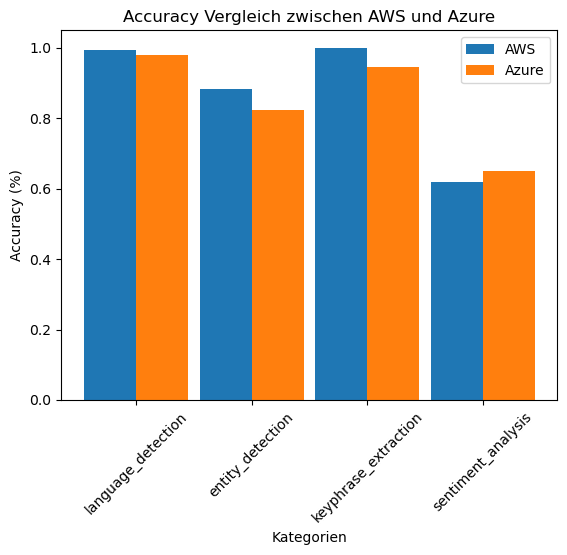

In [60]:
# Diagramm über die Genauigkeit von Azure und aws in der Gegenüberstellung - Text Analysen:
# Zunächst die Kategorien festlegen:
categories = ['language_detection', 'entity_detection', 'keyphrase_extraction', 'sentiment_analysis']
# Balkendiagram ausgeben:
print_diagram(results_text, categories)

Bei der Textanalyse sieht man einige Unterschiede bei den Genauigkeiten beider Cloud Plattformen. Manchmal ist aws besser, manchmal jedoch Azure. Je nach Festlegung der Testdaten, zum Beispiel bei der Entitydetection und der Schlüsselphrasenerkennung können auch hier die Ergebnisse unterschiedlich ausfallen. Je nachdem was man als Entity bzw. Schlüsselphrase festlegt. Was quantitativ und qualitativ jedoch gut vergleichbar ist sind die Werte bei der Spracherkennung und der Sentimentanalyse. Hier wurden jeweils 200 Datensätze analysiert. Bei beiden hat Azure leicht die Nase vorn.

#### 4.2 Gegenüberstellung Bildanalysen <a id='GGImage'></a>

[0.8, 0.6]
[0.8, 0.4]


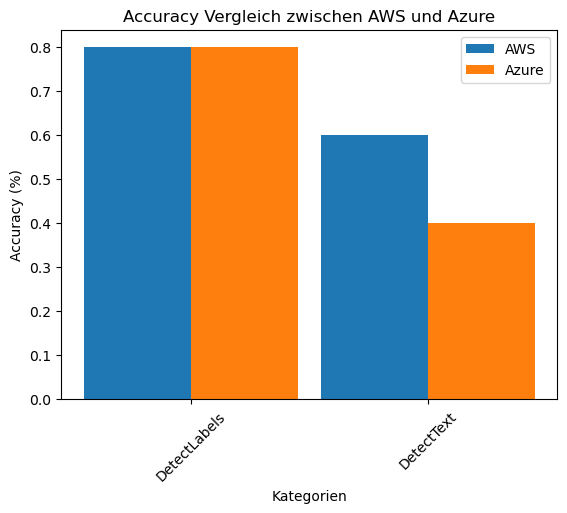

In [68]:
# Diagramm über die Genauigkeit von Azure und aws in der Gegenüberstellung - Image Analysen:
# Zunächst die Kategorien festlegen:
categories = ['DetectLabels', 'DetectText']
# Balkendiagram ausgeben:
print_diagram(results_images, categories)

Zusammenfassend kann man für die Analyse von Bildern bei dieser Größe des Vergleichs (max. 5 Bilder) nicht aussagekräftig sagen, welche Cloud Plattform besser abschneidet. Hier würden mehr Daten benötigt werden. Dies wurde im Rahmen dieser Arbeit nicht umgesetzt, da die Kosten sonst zu hoch wären. 

Dennoch kann man festhalten, dass die Genauigkeiten bei den Image-Analysen deutlich geringer ausfallen als noch bei der Textanalse. 